In [90]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from itertools import product

In [91]:
%matplotlib inline

In [101]:
out_data_folder = "wsl_images"
slide_name = "patient_192_node_3"

In [102]:
output_folder = os.path.join(out_data_folder, slide_name)
os.makedirs(output_folder, exist_ok=True)

In [94]:
wsl_image = tifffile.imread(f"data/{slide_name}.tif")
wsl_image.shape

(60928, 77824, 3)

In [95]:
OUTPUT_IMAGE_SIZE = 224
# The pixels cropped out of the image margins, to avoid
# extracting empty cells
IMAGE_PADDING = 11000

In [96]:
wsl_image = wsl_image[
    IMAGE_PADDING:(wsl_image.shape[0] - IMAGE_PADDING),
    IMAGE_PADDING:(wsl_image.shape[1] - IMAGE_PADDING),
    :
]

In [97]:
def image_per_cell(image: np.ndarray, x: int, y: int):
    return wsl_image[
        (OUTPUT_IMAGE_SIZE * x):(OUTPUT_IMAGE_SIZE * (x + 1)),
        (OUTPUT_IMAGE_SIZE * y):(OUTPUT_IMAGE_SIZE * (y + 1)),
        :
    ]

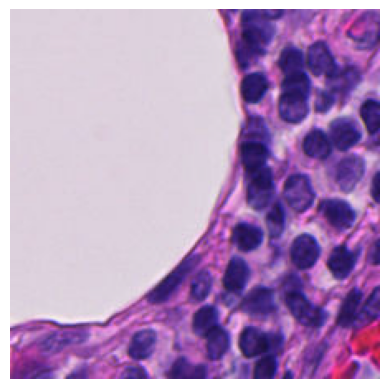

In [98]:
cell_image = image_per_cell(image=wsl_image, x=5, y=5)

plt.imshow(cell_image)
plt.axis("off")
plt.show()

In [99]:
n_rows = wsl_image.shape[0] // OUTPUT_IMAGE_SIZE
n_cols = wsl_image.shape[1] // OUTPUT_IMAGE_SIZE

In [103]:
for x, y in tqdm(product(range(n_rows), range(n_cols))):
    cell_image = Image.fromarray(
        image_per_cell(image=wsl_image, x=x, y=y)
    )

    cell_image.save(os.path.join(output_folder, f"cell_{x}_{y}.jpg"))

43077it [01:42, 420.86it/s]
